## Linear Regression
- Sales Prediction (marketing-vs-Sales)
- Build a multiple linear model which predicts sales based on the money spent on different platforms for marketing


In [1]:
import pandas as pd
marketing_data = pd.read_csv('./data/marketing-sales.csv')
marketing_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Cleaning and Pre-Processing
- Fix Data Types
- Normalization (if required)
- Handle missing data
- Perform Data transformation/filtering (if required)

In [3]:
marketing_data =marketing_data.fillna(marketing_data.mean())

## Exploratory Data Analysis

<Figure size 1000x500 with 0 Axes>

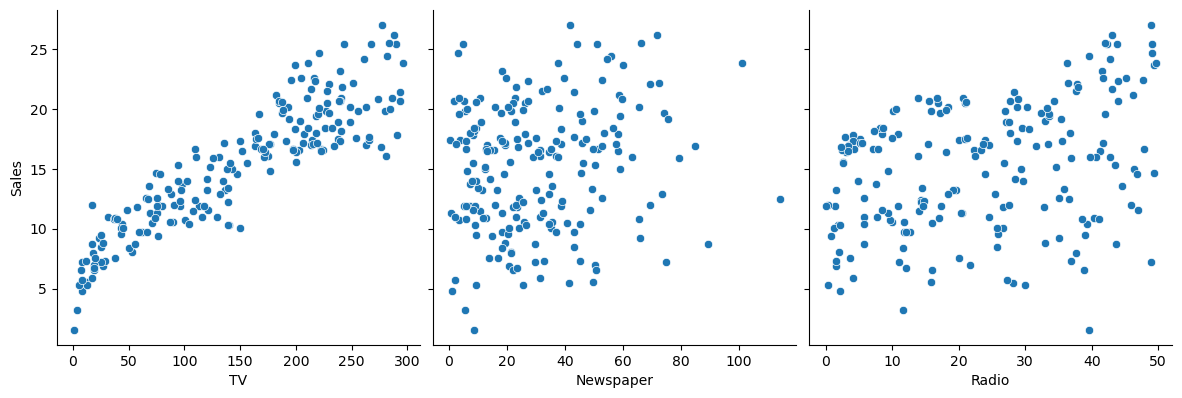

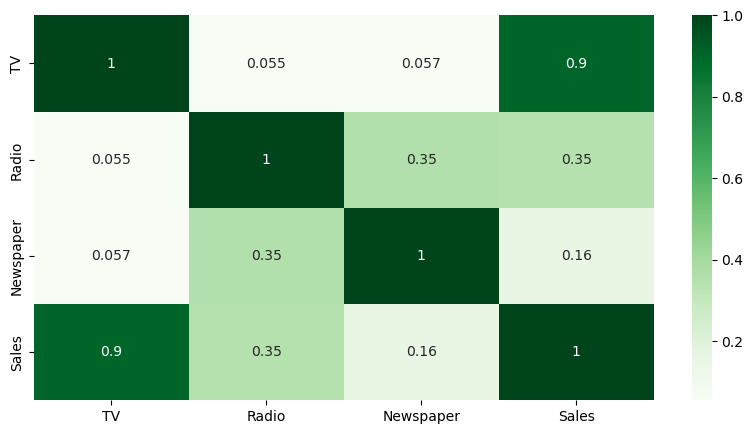

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# scattered plot between TV-Sales, Newspaper-Sales, Radio-Sales
plt.figure(figsize=(10,5))
sns.pairplot(marketing_data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

# Hitmap to find out the correlation between variables
plt.figure(figsize=(10,5))
sns.heatmap(marketing_data.corr(), cmap="Greens", annot = True)
plt.show()

### Build Multiple Linear Regression Model
- TV, Radio, Newspaper are features (x1,x2,x3)
- Sales is Label (y)

**Equation** :
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon$

### Prepare Train-Test Dataset

In [11]:
from sklearn.model_selection import train_test_split
# Define features (X) and target (y)
X = marketing_data[['TV', 'Radio', 'Newspaper']]
y = marketing_data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)


        TV  Radio  Newspaper
79   116.0    7.7       23.1
197  177.0    9.3        6.4
38    43.1   26.7       35.1
24    62.3   12.6       18.3
122  224.0    2.4       15.6
..     ...    ...        ...
106   25.0   11.0       29.7
14   204.1   32.9       46.0
92   217.7   33.5       59.0
179  165.6   10.0       17.6
102  280.2   10.1       21.4

[160 rows x 3 columns]
79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64


### Build Model

In [10]:
from sklearn.linear_model import LinearRegression

# Initialize the model
sales_model = LinearRegression()
# fit data to the model
sales_model.fit(X_train, y_train)

# Print the coefficients 
print("Coefficients:", sales_model.coef_)
print("Intercept:", sales_model.intercept_)

Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214134


### Evaluate Model

In [12]:
from sklearn.metrics import mean_squared_error
# Make predictions
y_pred = sales_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.907756910271091


### Inferences (Use model in real-world)

In [13]:
import numpy as np
import warnings

# Suppress warnings globally
warnings.filterwarnings("ignore", category=UserWarning)


# Single data point for inference
tv_ad_cost = 200
radio_ad_cost = 25
news_ad_cost = 40
# create 1x array_len matrix (column matrix)
single_data = np.array([tv_ad_cost,radio_ad_cost,news_ad_cost]).reshape(1,3)
print(single_data)
# Predict sales for the single data point
single_prediction = sales_model.predict(single_data)

# Display the prediction
print(f"Advertising Budget (TV: {tv_ad_cost}, Radio: {radio_ad_cost}, Newspaper: {news_ad_cost}) -> Predicted Sales: {single_prediction[0]:.2f}")

[[200  25  40]]
Advertising Budget (TV: 200, Radio: 25, Newspaper: 40) -> Predicted Sales: 18.31


## Homework (Should be included in this notebook and also should be present in assignment PDF)
- Load the dataset and understand the features
- Perform data preprocessing (handle missing values, normalization if needed).
- Perform Exploratory Data Analysis
- Split the dataset into training and testing sets.
- Build a Multiple Linear Regression model
- Evaluate the model’s performance with R-squared and Root Mean Squared
- Investigate the correlation between features and target and provide an explanation based on model coefficients.

### GROUP D: Predicting Pima Indians Diabetes
Dataset: Pima Indians Diabetes Dataset

Build a GNB model to predict whether a person has diabetes based on features like age, BMI, insulin levels, and blood pressure.

----------

### Step 1: Loading the Dataset

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Data/diabetes.csv')

# Display the first few rows
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### Step 2: Data Preprocessing

In [4]:
# Check for missing values
print(data.isnull().sum())

# If there are any missing values, handle them accordingly
# For this dataset, we assume there are no missing values as per the original Pima dataset.

# Split the data into features and target
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']                # Target variable

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Step 3: Split the Dataset

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Build and Train the GNB Model

In [6]:
from sklearn.naive_bayes import GaussianNB

# Create the model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

GaussianNB()

### Step 5: Make Predictions
Make predictions on the test set:

In [7]:
y_pred = gnb.predict(X_test)

### Step 6: Evaluate the Model
Evaluate the model using the specified metrics:

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from IPython.display import display
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.77
Precision: 0.66
Recall: 0.71
F1-Score: 0.68
Confusion Matrix:
[[79 20]
 [16 39]]


### Step 7: Predicting whether a person has diabetes based on features like age, BMI, insulin levels, and blood pressure.

In [18]:
import pandas as pd
from IPython.display import display

# Load the dataset
data = pd.read_csv('Data/diabetes.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())

# Map the Outcome values to 'Diabetic' and 'Non-Diabetic'
data['Outcome'] = data['Outcome'].map({0: 'Non-Diabetic', 1: 'Diabetic'})

# Group by the 'Outcome' column and calculate the mean of relevant features
summary_table = data.groupby('Outcome')[['Age', 'BMI', 'Insulin', 'BloodPressure']].mean()

# Display the summary table
print("\nSummary Table of Features Based on Diabetes Outcome:")
display(summary_table)

# Count the number of individuals by diabetes outcome
count_table = data['Outcome'].value_counts().reset_index()
count_table.columns = ['Outcome', 'Count']

# Display the count table
print("\nCount of Individuals by Diabetes Outcome:")
display(count_table)

First few rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Summary Table of Features Based on Diabetes Outcome:


,Age,BMI,Insulin,BloodPressure
Outcome,,,,
Diabetic,37.067164,35.142537,100.335821,70.824627
Non-Diabetic,31.190000,30.304200,68.792000,68.184000



Count of Individuals by Diabetes Outcome:


,Outcome,Count
0,Non-Diabetic,500
1,Diabetic,268
